<a href="https://colab.research.google.com/github/aunghlaingtun/iti107ai/blob/main/objectdetect1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Object Detection using YOLO

Raw Image Dataset
You can download the balloon images (without annotations) from this link:




1.   https://github.com/aunghlaingtun/iti107ai/blob/main/robodatasets/aung_robo_dataset.zip
2.   https://github.com/aunghlaingtun/iti107ai/blob/main/yolodatasets.zip

3.   https://github.com/aunghlaingtun/iti107ai/raw/main/yolo_ant_data.zip
4.   https://github.com/aunghlaingtun/iti107ai/blob/main/23Dec_data.zip

5.   https://github.com/aunghlaingtun/iti107ai/blob/main/24Dec_Data.zip
2.   List item


Unzip the file to a local folder.

There are total of 162 images. You should divide the images into both training and validation set (e.g. 80%-20%, i.e. 59 images for train, and 15 for test).

In [2]:

%%capture
%%bash

wget https://github.com/aunghlaingtun/iti107ai/raw/main/24Dec_Data.zip

mkdir -p datasets
unzip 24Dec_Data.zip -d datasets/

In [3]:
%%capture
!pip install ultralytics
!pip install comet_ml

## Training the Model

YOLOv8 comes with different sizes of pretrained models: yolov8n, yolov8s, .... They differs in terms of their sizes, inference speeds and mean average precision:

<img src="https://github.com/nyp-sit/iti107-2024S2/blob/main/assets/yolo-models.png?raw=true" width="70%"/>


We will use the small pretrained model yolo8s and finetune it on our custom dataset.


### Setup the logging

Ultralytics support logging to `wandb`, `comet.ml` and `tensorboard`, out of the box. Here we only enable wandb.

we need to create an account at [`wandb`](https://wandb.ai) and get the API key from https://wandb.ai/authorize.


In [4]:
from ultralytics import settings

settings.update({"wandb": True,
                  # "comet.ml": False,
                 "tensorboard": False})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Training

We specify the path to `data.yaml` file, and train with a batch size of 15, and we also save the checkpoint at each epoch (save_period=1). We assume here you are connected to a GPU, hence we can specify the device to use as `device=0` to select the first GPU.  We specify the project name as `balloon`, this will create a folder called `balloon` to store the weights and various training artifacts such as F1, PR curves, confusion matrics, training results (loss, mAP, etc).

For a complete listing of train settings, you can see [here](https://docs.ultralytics.com/modes/train/#train-settings).

You can also specify the type of data [augmentation](https://docs.ultralytics.com/modes/train/#augmentation-settings-and-hyperparameters)  you want as part of the train pipeline.

You can monitor your training progress at wandb (the link is given in the train output below)

In [6]:
from ultralytics import YOLO
from ultralytics import settings

model = YOLO("yolov8m.pt")  # Load a pre-trained YOLO model
result = model.train(data="datasets/data.yaml",
                     epochs=100,
                     lr0=0.001,
                     save_period=2,
                     batch=32,
                     device=0,
                     project='test_run25',
                     augment=True,

                     plots=True)


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=datasets/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=test_run25, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 42.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 185MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 429 images, 0 backgrounds, 0 corrupt: 100%|██████████| 429/429 [00:00<00:00, 1040.27it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 754.69it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to test_run25/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to test_run25/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.3G      1.731      3.526      1.941         50        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all         41         96      0.407      0.452      0.352      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.5G      1.594      1.907      1.764         55        640: 100%|██████████| 14/14 [00:12<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96     0.0698     0.0857     0.0233    0.00818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.5G      1.641       1.79      1.793         44        640: 100%|██████████| 14/14 [00:13<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         41         96    0.00056     0.0553   0.000303   8.09e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.6G      1.674      1.657      1.823         47        640: 100%|██████████| 14/14 [00:13<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96   0.000361     0.0225   0.000134   1.74e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.6G      1.628      1.538      1.763         27        640: 100%|██████████| 14/14 [00:13<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96     0.0252      0.141     0.0286     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.6G      1.646      1.586      1.809         38        640: 100%|██████████| 14/14 [00:13<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96    0.00225      0.045    0.00136   0.000406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.6G      1.622      1.469       1.74         46        640: 100%|██████████| 14/14 [00:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         41         96      0.132      0.195     0.0753     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.6G      1.663      1.516       1.79         38        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         41         96      0.354      0.533      0.273     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.6G      1.605      1.483      1.768         55        640: 100%|██████████| 14/14 [00:14<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96     0.0163     0.0778    0.00643    0.00233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.6G       1.61      1.452      1.781         35        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96     0.0166      0.299    0.00864    0.00294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.5G      1.586       1.41      1.705         52        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96     0.0558      0.208      0.057     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.6G       1.58      1.354      1.706         38        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         41         96      0.442      0.415      0.304      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.6G      1.527      1.312       1.69         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.564      0.358      0.342      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.6G      1.473      1.204      1.644         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.339      0.367      0.284      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.6G      1.495       1.29      1.688         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.516      0.538       0.49      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.6G      1.478      1.218       1.62         26        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.427       0.54      0.394      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.6G       1.41      1.113        1.6         35        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.577      0.379      0.352      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.6G      1.509      1.207      1.655         32        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.479      0.432      0.402      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.6G      1.399      1.119      1.578         56        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.666      0.555      0.539      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.6G      1.364      1.067      1.546         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.501       0.52       0.44      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.6G      1.356      1.047      1.502         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96      0.738      0.609      0.661      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.5G      1.392       1.08      1.546         38        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.718      0.513      0.516      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.6G      1.327      1.025      1.501         35        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96       0.61      0.624       0.58      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.6G      1.305       1.03      1.508         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.528      0.558       0.54       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.6G      1.272      0.973      1.461         55        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.577       0.64      0.633       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.6G      1.299     0.9886      1.489         39        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.504      0.657      0.575      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.5G      1.238     0.9244      1.446         39        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.634      0.647      0.623      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.6G      1.306     0.9163      1.452         59        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.724      0.632      0.692        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.6G      1.216     0.9089      1.421         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.693      0.644      0.671      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.6G      1.133     0.8388      1.371         52        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.784      0.563      0.657      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.6G      1.173     0.8551      1.399         36        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96      0.773      0.603      0.634      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.6G      1.183     0.8691      1.394         45        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.693       0.71      0.667      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.6G      1.161     0.8152      1.387         49        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.682      0.727       0.71      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.6G      1.132     0.7937      1.391         40        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.819      0.618      0.737      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.6G      1.132     0.8194      1.381         37        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96       0.62      0.669      0.635      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      13.6G      1.142     0.8222      1.378         50        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96       0.78      0.671      0.714      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.6G      1.102     0.7601      1.323         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.835      0.732       0.75      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.6G      1.146     0.7982      1.388         50        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.747      0.673      0.698      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.5G      1.107     0.7553      1.355         35        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.757      0.659      0.719      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.6G      1.077     0.7556      1.344         27        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.557      0.677      0.582      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.6G      1.076     0.7576       1.31         31        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.789       0.61      0.671      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.6G      1.094     0.7736       1.34         35        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.856      0.743      0.791      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.6G      1.052     0.7539      1.315         40        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.777      0.738      0.767      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.6G      1.077     0.7571      1.335         36        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.692      0.773      0.736       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.5G      1.019     0.6971      1.265         54        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.773      0.581      0.664      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.6G          1     0.6979      1.286         54        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         41         96      0.744      0.756       0.77      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.6G      1.016     0.6866      1.262         37        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96      0.787      0.673      0.715      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.5G      1.024     0.7255      1.297         42        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.754      0.678      0.711      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.6G     0.9496     0.6717      1.255         41        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.775      0.728      0.791      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.5G     0.9477     0.6556      1.252         46        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.848      0.715      0.774      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.5G     0.9459     0.6437      1.217         48        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.764      0.608      0.692      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.6G     0.9875     0.6687      1.269         43        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.773      0.702      0.724      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.6G     0.9278     0.6173      1.221         56        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.884      0.687      0.774      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.6G     0.9253     0.6376      1.228         40        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.814      0.772      0.779      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      13.6G     0.8945      0.619      1.216         37        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96       0.87      0.663      0.765      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.5G     0.9125     0.6223      1.229         43        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.773      0.753      0.743       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.6G     0.8726     0.6058      1.208         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.897      0.716      0.796      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.6G     0.8944     0.6022      1.197         71        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.811      0.652      0.763      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.5G     0.9077     0.5903      1.196         63        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.727      0.749      0.739      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.5G     0.8757     0.5769      1.196         32        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.785      0.741       0.75      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.5G     0.8869     0.5822      1.208         39        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96       0.74      0.718      0.734      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.6G     0.8266     0.5626      1.175         41        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.808      0.718      0.761      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.6G     0.8079     0.5377      1.143         49        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.814      0.694      0.778      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.6G      0.832     0.5551      1.178         47        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.912      0.706      0.817      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.6G     0.8435      0.552       1.16         42        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.864      0.653      0.744      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.5G     0.8205     0.5366      1.148         43        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.758       0.79      0.792      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.6G     0.8076     0.5431      1.158         45        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.819      0.728      0.781      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.6G     0.7633     0.5035      1.122         46        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.791      0.701      0.758      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.5G     0.7652     0.5155       1.12         55        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.816      0.754      0.765      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      13.6G     0.7799     0.5105      1.117         46        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.793      0.741      0.777       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.6G     0.7744     0.5184      1.152         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.804      0.759      0.759      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.6G     0.7642     0.5006      1.122         41        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.868      0.662      0.756      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.5G     0.7615     0.5083       1.13         38        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.776      0.736      0.714      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      13.6G     0.7667     0.4974      1.119         24        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.846      0.698      0.748      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.6G     0.7734     0.5219       1.13         38        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96       0.82      0.724      0.753      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.6G     0.7335     0.4869       1.09         41        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.886       0.73      0.772      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.5G     0.6938     0.4713      1.094         54        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96       0.78      0.683      0.711      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      13.6G     0.7316     0.4959      1.119         43        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.814       0.76      0.784      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.6G     0.7476     0.4889      1.106         55        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96       0.86      0.737      0.804      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.6G     0.7181     0.4733      1.096         37        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.874      0.721        0.8      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.6G      0.723      0.472      1.099         42        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         41         96      0.882      0.694      0.789      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.6G     0.6852     0.4601      1.079         62        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96       0.87      0.655       0.76      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.6G     0.7142     0.4622      1.074         53        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         41         96      0.855      0.696      0.759      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.6G     0.6511      0.433       1.06         47        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.825      0.736      0.773      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      13.6G     0.6824     0.4653      1.075         28        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.837      0.697      0.755      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.6G     0.6577     0.4389      1.066         34        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.803      0.758      0.779      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.6G     0.6397     0.4241      1.053         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         41         96      0.834       0.73      0.788      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.6G     0.6593      0.432      1.062         44        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.841      0.731      0.787      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.5G      0.633      0.429      1.039         46        640: 100%|██████████| 14/14 [00:14<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96       0.84       0.74      0.793      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.5G     0.6255     0.4343      1.048         34        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96       0.86      0.762      0.799      0.397


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      13.5G      0.561     0.3536     0.9879         25        640: 100%|██████████| 14/14 [00:15<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         41         96      0.857       0.73      0.798      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      13.5G     0.5326     0.3327     0.9673         19        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         41         96      0.866      0.726      0.795      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.5G     0.5169     0.3265     0.9772         22        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.856      0.715      0.799      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.6G     0.5221     0.3343     0.9749         29        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         41         96      0.836       0.74      0.793      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.5G     0.4882     0.3108     0.9482         27        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         41         96      0.845      0.746       0.79      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      13.5G     0.4657     0.2941     0.9482         20        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96       0.82      0.772      0.801      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      13.5G     0.4833     0.3018     0.9474         17        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.827      0.755      0.799      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.6G     0.4608     0.2991     0.9445         21        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         41         96      0.868      0.728        0.8      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.5G     0.4782     0.3029     0.9469         13        640: 100%|██████████| 14/14 [00:13<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.824      0.765      0.804      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.5G     0.4667      0.293     0.9437         21        640: 100%|██████████| 14/14 [00:13<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         41         96      0.832      0.769      0.805      0.403



100 epochs completed in 0.444 hours.
Optimizer stripped from test_run25/train/weights/last.pt, 52.0MB
Optimizer stripped from test_run25/train/weights/best.pt, 52.0MB

Validating test_run25/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


                   all         41         96      0.826      0.745      0.788      0.426
                  mask         16         61      0.898      0.718      0.818      0.431
                 shark         25         35      0.754      0.771      0.758      0.422
Speed: 0.2ms preprocess, 26.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to test_run25/train


lr/pg0,█████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
lr/pg1,▂▃▅▆██████▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▁▁
lr/pg2,▂▆▇███▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▂▂▂▂▂▁▁
metrics/mAP50(B),▄▁▁▁▁▄▄▅▇▇▇▇▇▇▇▇██▇▇▇███▇▇██████████████
metrics/mAP50-95(B),▁▁▁▁▁▄▄▅▅▅▆▆▆▆▆▇▇▆▆▆▆▇▇▇▆▇▇▇▇▇▇█████▇███
metrics/precision(B),▂▁▁▁▅▅▅▆▅▇▅▇▆▇▇▇▇▆▇▇█▇▇▇█▇▇▇▇█▇▇███▇██▇▇
metrics/recall(B),▂▁▁▆▆▅▆▆▇▆▇▇▆▇█▇█▇▇██▇█▇██▇▇▇█▇▇▇█████▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██████▇▇▇▇▆▆▆▅▅▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▁▁▁


In [8]:
model = YOLO("test_run25/train/weights/best.pt")

# Validate with a higher IoU threshold
results = model.val(iou_thres=0.75)  # Set IoU threshold to 0.75
print(results)


SyntaxError: '[31m[1miou_thres[0m' is not a valid YOLO argument. 

    Arguments received: ['yolo', '-f', '/root/.local/share/jupyter/runtime/kernel-9be97e92-c83c-4371-ad65-7ce576921864.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'pose', 'segment', 'detect', 'obb'}
                MODE (required) is one of {'track', 'val', 'benchmark', 'train', 'export', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolo11n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLO11n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolo11n-cls.pt format=onnx imgsz=224,128

    5. Ultralytics solutions usage
        yolo solutions count or in ['heatmap', 'queue', 'speed', 'workout', 'analytics', 'trackzone', 'inference'] source="path/to/video/file.mp4"

    6. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg
        yolo solutions help

    Docs: https://docs.ultralytics.com
    Solutions: https://docs.ultralytics.com/solutions/
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)



```
from ultralytics import YOLO
from ultralytics import settings
model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model
result = model.train(data="datasets/data.yaml",
                     epochs=70,
                     save_period=3,
                     batch=32,
                     device=0,
                     project='Test_Run2',
                     lr0=0.01,                   # Initial learning rate
                     lrf=0.2,                    # Final learning rate fraction
                     augment=True,
                     plots=True)
```



In [7]:
from ultralytics import YOLO

model = YOLO("test_run25/train/weights/best.pt")
validation_results = model.val(data="datasets/data.yaml", device="0")

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


                   all         41         96      0.874      0.721        0.8      0.428
                  mask         16         61      0.887      0.643      0.813      0.424
                 shark         25         35      0.862        0.8      0.787      0.432
Speed: 0.3ms preprocess, 31.1ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val


Export and Deployment

In [17]:
print('/content/test/train/results.png')

/content/test/train/results.png




```
from ultralytics.utils.benchmarks import benchmark

# # Benchmark on GPU (device=0 means the 1st GPU device)
benchmark(model="SharkVsMask/train/weights/best.pt", data="datasets/data.yaml", imgsz=640, half=False, device=0)

```



# exporting as openvino format


In [31]:
model = YOLO("test_run25/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)

Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'test_run25/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)

OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: collecting INT8 calibration images from 'data=coco8.yaml'


Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

OpenVINO: WARNING ⚠️ >300 images recommended for INT8 calibration, found 4 images.


INFO:nncf:16 ignored nodes were found by patterns in the NNCFGraph
INFO:nncf:1 ignored nodes were found by types in the NNCFGraph
INFO:nncf:Not adding activation input quantizer for operation: 205 __module.model.22.dfl/aten::view/Reshape
INFO:nncf:Not adding activation input quantizer for operation: 206 __module.model.22/aten::sigmoid/Sigmoid
INFO:nncf:Not adding activation input quantizer for operation: 217 __module.model.22.dfl/aten::transpose/Transpose
INFO:nncf:Not adding activation input quantizer for operation: 229 __module.model.22.dfl/aten::softmax/Softmax
INFO:nncf:Not adding activation input quantizer for operation: 241 __module.model.22.dfl.conv/aten::_convolution/Convolution
INFO:nncf:Not adding activation input quantizer for operation: 251 __module.model.22.dfl/aten::view/Reshape_1
INFO:nncf:Not adding activation input quantizer for operation: 267 __module.model.22/aten::sub/Subtract
INFO:nncf:Not adding activation input quantizer for operation: 268 __module.model.22/aten:

Output()

Output()

OpenVINO: export success ✅ 26.9s, saved as 'test_run25/train/weights/best_int8_openvino_model/' (25.4 MB)

Export complete (28.1s)
Results saved to /content/test_run25/train/weights
Predict:         yolo predict task=detect model=test_run25/train/weights/best_int8_openvino_model imgsz=640 int8 
Validate:        yolo val task=detect model=test_run25/train/weights/best_int8_openvino_model imgsz=640 data=datasets/data.yaml int8 
Visualize:       https://netron.app


## Inference

Test model on some sample pictures. You can optionally specify the confidence threshold (e.g. `conf=0.5`), and the IoU (e.g. `iou=0.6`) for the NMS. The model will only output the bounding boxes of those detection that exceeds the confidence threshould and the IoU threshold.  

In [36]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("test_run25/train/weights/best_int8_openvino_model", task='detect')

# Define the paths to your test images or videos
source1 = 'https://github.com/aunghlaingtun/iti107ai/raw/main/sample/shark.jpg'
source2 = 'https://github.com/aunghlaingtun/iti107ai/raw/main/sample/maskNshark.jpg'
source3 = 'https://github.com/aunghlaingtun/iti107ai/raw/main/sample/testimage.jpg'

# Function to run predictions and print results
def run_predictions(source):
    results = model.predict(source)  # Run prediction on the source
    for r in results:
        for box in r.boxes:
            class_id = int(box.cls)
            conf = float(box.conf)
            name = r.names[class_id]
            print(f"Detected '{name}' with confidence {conf:.2f}")

# Run predictions for each source
print("Results for source1:")
run_predictions(source1)

print("\nResults for source2:")
run_predictions(source2)

print("\nResults for source3:")
run_predictions(source3)

Results for source1:
Loading test_run25/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

Found https://github.com/aunghlaingtun/iti107ai/raw/main/sample/shark.jpg locally at shark.jpg
image 1/1 /content/shark.jpg: 640x640 2 sharks, 167.5ms
Speed: 4.0ms preprocess, 167.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Detected 'shark' with confidence 0.89
Detected 'shark' with confidence 0.84

Results for source2:

Found https://github.com/aunghlaingtun/iti107ai/raw/main/sample/maskNshark.jpg locally at maskNshark.jpg
image 1/1 /content/maskNshark.jpg: 640x640 2 masks, 163.7ms
Speed: 4.1ms preprocess, 163.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Detected 'mask' with confidence 0.79
Detected 'mask' with confidence 0.70

Results for source3:

Found https://github.com/aunghlaingtun/iti107ai/raw/main/sample/testimage.jpg locally at testimage.jpg
image 1/1 /content/testimage.j

Loading test_run25/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

Found https://github.com/aunghlaingtun/iti107ai/raw/main/sample/testimage.jpg locally at testimage.jpg
image 1/1 /content/testimage.jpg: 640x640 1 mask, 3 sharks, 169.5ms
Speed: 3.3ms preprocess, 169.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'mask', 1: 'shark'}
obb: None
orig_img: array([[[ 62,  20,   0],
        [143,  91,  31],
        [168,  98,  14],
        ...,
        [ 16,   3,   0],
        [  2,   0,   4],
        [  4,   2,   2]],

       [[ 66,  21,   0],
        [147,  93,  33],
        [171,  98,  16],
        ...,
        [ 16,   3,   0],
        [  2,   0,   4],
        [  4,   2,   2]],

       [[ 69,  21,   0],
        [149,  92,  36],
        [176,  99,  20],
  

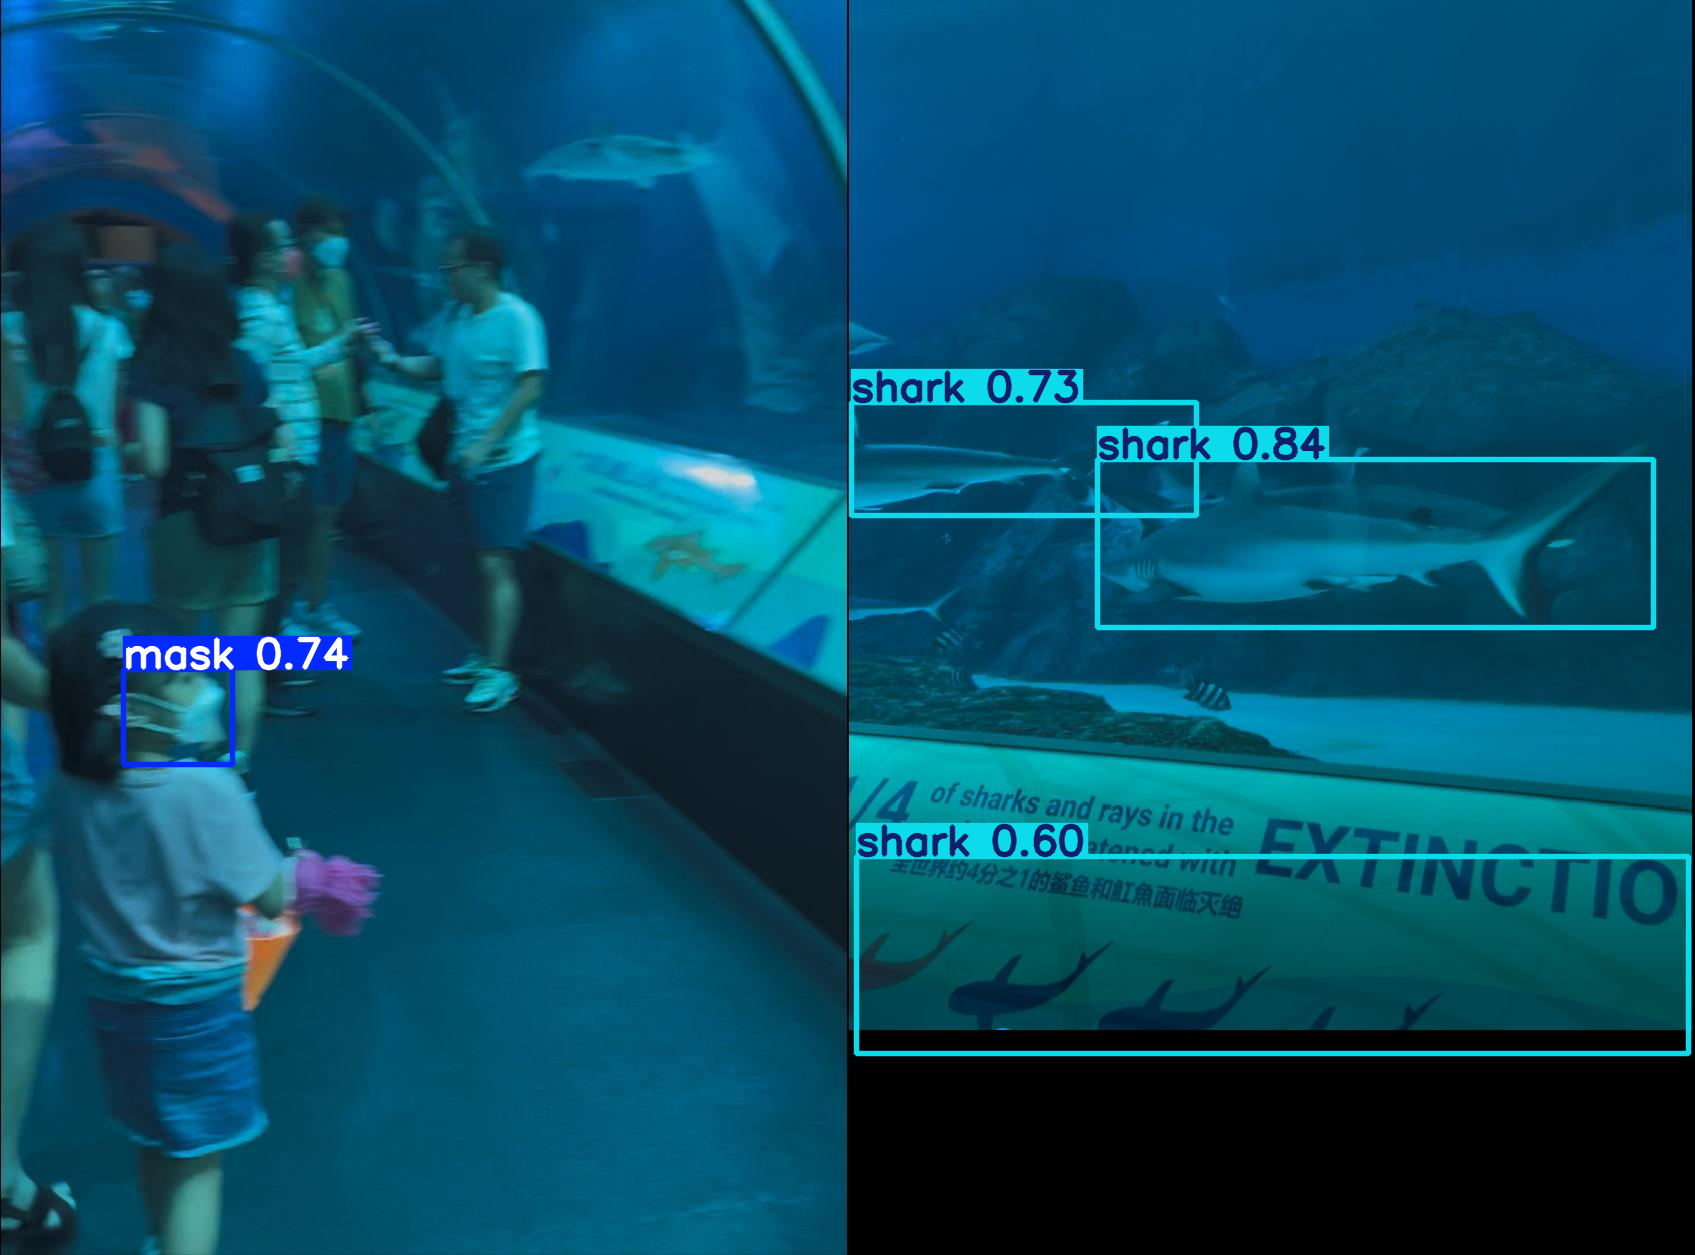

In [37]:
import ultralytics
from ultralytics import YOLO
from PIL import Image

source = 'https://github.com/aunghlaingtun/iti107ai/raw/main/sample/testimage.jpg'


model = YOLO("test_run25/train/weights/best_int8_openvino_model", task='detect')
result = model(source, conf=0.5, iou=0.6)

# Visualize the results
for i, r in enumerate(result):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    #  im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

In [15]:
import locale
import locale
locale.getpreferredencoding = lambda: "UTF-8"




In [16]:
%%bash

mv ./test_run25/train/weights/best_int8_openvino_model/ .
zip -r best_int8_openvino_model.zip best_int8_openvino_model

  adding: best_int8_openvino_model/ (stored 0%)
  adding: best_int8_openvino_model/best.xml (deflated 95%)
  adding: best_int8_openvino_model/best.bin (deflated 14%)
  adding: best_int8_openvino_model/metadata.yaml (deflated 31%)


In [ ]:
model = YOLO("test_run24/train/weights/best_int8_openvino_model", task='detect')

In [ ]:
from ultralytics import YOLO
import cv2
# Import the necessary function for displaying images in Colab
from google.colab.patches import cv2_imshow

# Load the YOLO model
model = YOLO("/content/best_int8_openvino_model", task='detect')

# Open the video file
video_path = "MaskNshark.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame on GPU Device 0
        results = model(frame, device="0")

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame using cv2_imshow
        cv2_imshow(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

In [22]:
from ultralytics import YOLO
import cv2
# from tqdm import tqdm
from tqdm.auto import tqdm

def write_video(video_in_filepath, video_out_filepath,model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on GPU Device 0
            results = model(frame, conf=0.7, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [23]:
from pathlib import Path
import os

video_in_file = "SharkNmask.mp4"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')
model =  YOLO("best_int8_openvino_model", task="detect")
write_video(video_in_file, video_out_file, model)

  0%|          | 0/968 [00:00<?, ?it/s]

Loading best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

0: 640x640 (no detections), 232.3ms
Speed: 7.0ms preprocess, 232.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 217.0ms
Speed: 10.8ms preprocess, 217.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 215.4ms
Speed: 12.0ms preprocess, 215.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 232.1ms
Speed: 8.4ms preprocess, 232.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 228.3ms
Speed: 11.8ms preprocess, 228.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 235.6ms
Speed: 14.6ms preprocess, 235.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 227.6ms
Speed: 18.2ms preprocess, 227.6ms inf

In [25]:
from PIL import Image

#source = './samples/maskNshark.jpeg'
# Open the two images
image1 = Image.open("/content/mask.jpg")
image2 = Image.open("/content/shark.png")

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Create a new image with the combined width and the maximum height
combined_width = width1 + width2
combined_height = max(height1, height2)
combined_image = Image.new("RGB", (combined_width, combined_height))

# Paste the images into the combined image
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (width1, 0))

# Save the combined image
combined_image.save("combined_image.jpg")

# Display the combined image
combined_image.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')